In [1]:
import numpy as np
import time

In [2]:
names = [91, 111, 106, 104, 101, 327, 331, 332, 335, 94, 346, 348, 352, 401, 798, 92, 245, 325, 97, 1198, 1124, 1126, 1205, 1206, 1183, 1204, 1186, 1187, 1188, 1190, 1191, 90, 147, 159, 161, 1080, 157, 1081, 1100, 1101, 1102, 1103, 150, 173, 174, 175, 443, 1099, 154, 176, 177, 178, 179, 180, 156, 158, 162, 163, 1104, 1237, 164, 165, 166, 167, 916, 919, 168, 169, 170, 171, 172, 917, 918, 1105, 89, 141, 142, 143, 139, 136, 137, 138, 133, 135, 134, 131, 126, 130, 129, 127, 128, 123, 125, 124, 116, 122, 119, 121, 120, 117, 118, 936, 105, 114, 115, 113, 112, 110, 108, 107, 937, 103, 93, 98, 102, 99, 100, 96, 95, 132, 144, 145, 146, 148, 149, 151, 152, 153, 457, 458, 637, 638, 459, 460, 461, 639, 640, 462, 464, 641, 466, 595, 596, 597, 636, 181, 182, 193, 200, 446, 197, 218, 219, 220, 221, 222, 223, 224, 225, 198, 201, 235, 202, 240, 243, 448, 449, 451, 452, 203, 204, 445, 970, 226, 228, 229, 230, 231, 227, 199, 249, 250, 263, 274, 276, 277, 1388, 1422, 292, 1389, 303, 306, 307, 308, 1384, 1385, 1386, 1387, 310, 312, 314, 316, 1424, 1145, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 456, 419, 420, 421, 422, 838, 839, 840, 841, 842, 843, 884, 423, 424, 425, 426, 427, 1497, 428, 429, 430, 997, 1028, 1029, 1030, 1031, 1046, 1144, 1121, 1127, 1261, 1262, 1334, 1430, 431, 1189, 432, 433, 435, 436, 437, 439, 442, 453, 454, 1079, 705, 194, 196, 210, 1499, 1500, 1501, 706, 707, 708, 709, 711, 725, 712, 713, 714, 715, 716, 717, 767, 768, 1143, 1214, 1345, 720, 721, 722, 1213, 723, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 560, 563, 564, 566, 570, 589, 1074, 576, 585, 578, 586, 579, 587, 583, 590, 591, 592, 1082, 598, 508, 509, 535, 510, 538, 1463, 539, 540, 547, 553, 554, 557, 573, 581, 1390, 892, 1219, 1377, 1234, 599, 605, 606, 607, 608, 609, 611, 610, 612, 601, 600, 603, 1464, 1465, 604, 1220, 1397, 1221, 1223, 613, 629, 1240, 1241, 1242, 1243, 1244, 1250, 1289, 614, 615, 616, 617, 618, 620, 621, 1327, 630, 1245, 1323, 1328, 631, 1320, 1321, 1322, 634, 1247, 1248, 1249, 1083, 619, 1292, 1294, 1084, 1326, 1286, 1288, 1290, 622, 623, 624, 625, 626, 627, 628, 635, 1291, 1295, 1299, 1316, 1317, 632, 1246, 1252, 1253, 1254, 1255, 633, 1296, 1297, 1298, 1318, 1319, 1324, 1325, 1287, 1293, 1236, 1376, 1455, 1456, 1457, 1458, 1461, 1462, 642, 643, 648, 649, 1182, 650, 959, 651, 652, 1157, 653, 654, 759, 644, 655, 1158, 656, 657, 658, 645, 659, 660, 1227, 647, 664, 1235, 1348, 1378, 1353, 1356, 1355, 1360, 1362, 1365, 1366, 1367, 1368, 1382, 1383, 1369, 1370, 1371, 1372, 661, 646, 662, 663, 799, 1132, 1133, 668, 669, 674, 1229, 672, 673, 676, 677, 695, 697, 698, 699, 700, 670, 678, 679, 680, 683, 701, 702, 703, 704, 681, 1215, 1216, 1217, 1315, 728, 729, 730, 732, 733, 769, 770, 771, 772, 773, 774, 775, 776, 1222, 734, 738, 739, 762, 743, 745, 747, 748, 764, 744, 749, 754, 755, 757, 750, 752, 753]

In [3]:
_time = time.time()
uniqUrls = {}
for number in names:
    f1 = open('data/categories/{}_urls.txt'.format(number))
    f2 = open('data/categories/{}_text.txt'.format(number))
    categUrls = f1.readlines()
    categText = f2.readlines()
    f1.close()
    f2.close()
    
    if len(categUrls[0]) > 1:
        categUrls = [i.split()[0].replace('\n', '') for i in categUrls]

        for i in range(len(categUrls)):
            if 'notext' not in categText[i] and \
                not ('error' in categText[i] and 'connect' in categText[i]) and \
                len(categText[i]) > 1:
                if categUrls[i] not in uniqUrls:
                    uniqUrls[categUrls[i]] = categText[i]
print(time.time() - _time)

46.45923328399658


In [4]:
words = {}
for i in uniqUrls:
    for j in uniqUrls[i].split():
        if j in words:
            words[j] += 1
        else:
            words[j] = 1

In [5]:
mas = np.zeros((11))
for i in words:
    if words[i] <= 10:
        mas[words[i]] += 1

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mas

array([      0.,  826113.,  195506.,   67158.,   42403.,   25178.,
         18721.,   13595.,   11042.,    8790.,    7500.])

In [8]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

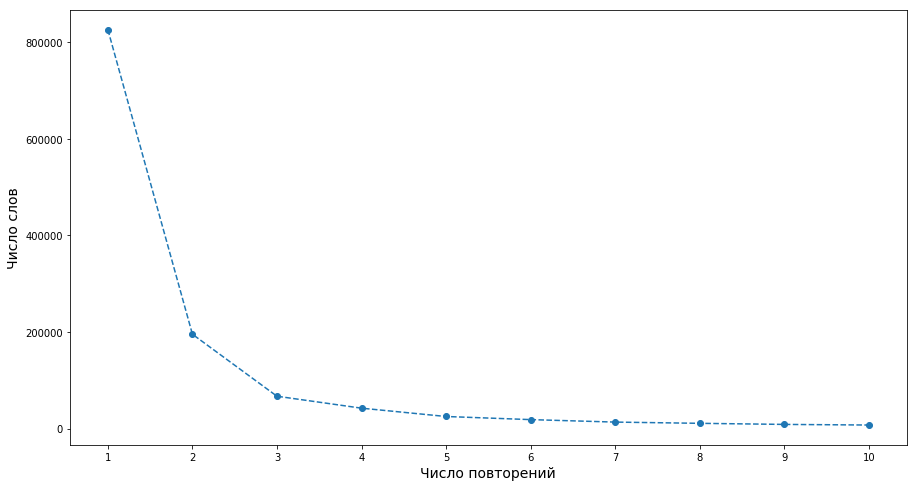

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1,11), mas[1:], 'o--')
plt.xlabel('Число повторений', fontsize=14)
plt.ylabel('Число слов', fontsize=14)
plt.xticks(np.arange(1,11))
plt.savefig('')
plt.show()

In [36]:
mas2 = np.zeros((mas.shape[0]))
for i in range(1, mas.shape[0]):
    mas2[i] = mas[i] + mas2[i-1]

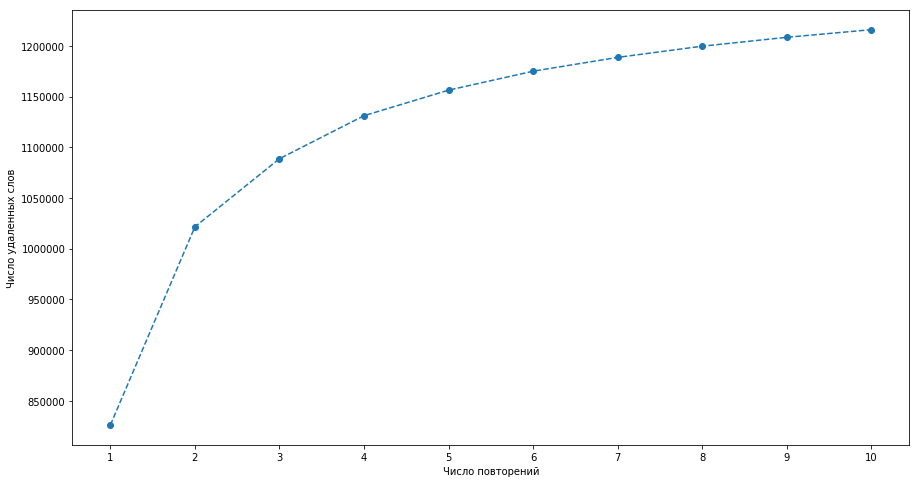

In [40]:
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1,11), mas2[1:], 'o--')
plt.xlabel('Число повторений')
plt.ylabel('Число удаленных слов')
plt.xticks(np.arange(1,11))
plt.show()

In [12]:
delWords = set(['а', 'без', 'в', 'во', 'на', 'с', 'со', 'до', 'для', 'за', 'из', 'из-за', 'к', 'ко', 'между', 'у',\
            'над', 'надо', 'без', 'не', 'о', 'об', 'обо', 'от', 'перед', 'по', 'под', 'подо', 'после', 'пред',\
            'при', 'про',\
            'чей', 'себя', 'сколько', 'любой', 'самый', 'что', 'некого', 'он', 'она', 'где', 'весь', 'я', 'ты',\
            'сам', 'какой', 'зачем', 'никто', 'наш', 'незачем', 'мы', 'свой', 'кто-то', 'другой', 'их',\
            'никакой', 'который', 'ничей', 'нечто', 'они', 'каковой', 'вы', 'такой', 'ничто', 'какой-либо',\
            'когда', 'этот', 'каждый', 'некто', 'тот', 'каков', 'всякий', 'нечего', 'ваш', 'таков', 'столько',\
            'что-нибудь', 'сей', 'иной', 'несколько', 'его', 'твой', 'оно', 'её', 'некоторый', 'мой', 'откуда',\
            'кто', '2017', 'это', 'как', 'сайт', 'быть', 'или',
           ])

for i in words:
    if words[i] <= 5:
        delWords.add(i)

In [16]:
st = 'продажа компьютер по низкий цена от 9000р компьютерный магазин предлагать за 9000р 155000р купить компьютер офис сборка на заказ наш интернет магазин компьютер главный компания контакт гарантия доставка способ оплата не дозвониться оставить ваш телефон мы перезвонить ваш имя ваш телефон указать причинуникто не брать трубкупроблема соединениеммна быть удобно если вы презвонить выбрать менеджер оценить мы похвалить пожаловаться посоветовать читать отзыв каталогноутбукипланшетыкомпьютер игровой домашний офисный эконом стандарт комфорт премиум миниатюрный неттоп микро компьютер минь компьютер рабочий станция для создание дизайн для 3d графика для видеомонтаж для проектирование для работа на биржа выгодный комплект без компромисс стильный мощный моноблок сервер hp lenovo acer сборка на заказмониторыпринтёр мфусканерымультимедиасетевой оборудованиеустройство ручной вводаtv тюнерыибп сетевой фильтрыкорпусапрограммный обеспечениеоргтехникадополнительный компьютерамкомплектовать поиск разделыдоставкаусловие online agr гарантияконтактыый компанииспособ оплатыакция покупатель на меть этот строка вставить код ниже процессор люба amd intel sun microsystems via линейка любой a10 a4 a6 a8 a8 3800 athlon ii x2 athlon ii x3 athlon ii x4 atom celeron core i3 core i5 core i7 350 apu e2 fx 4100 fx 4300 fx 4350 fx 6100 fx 6300 fx 8120 fx 8150 fx 8320 fx 8350 fx 9370 pentium pentium dual core phenom sempron u4025 xeonоперативный память от гбдо гб видеокарта любой geforce 660 ti geforce 9400 mpgu geforce gt 545 geforce gt 610 geforce gt 620 geforce gt 630 geforce gt 640 geforce gt 720 geforce gt 730 geforce gt 740 geforce gtx 650 geforce gtx 650 ti geforce gtx 660 geforce gtx 660 ti geforce gtx 670 geforce gtx 680 geforce gtx 690 geforce gtx 750 geforce gtx 760 geforce gtx 770 geforce gtx 780 geforce gtx 950 geforce gtx 960 geforce gtx 970 geforce gtx 980 geforce gtx titan geforce gtx titan gma 3000 gma 3150 gma 950 gma hd gma x3100 hd 6310 intel intel hd graphics ion ion gt218 quadro 2000 quadro 400 quadro 4000 quadro 600 radeon hd 6370d radeon hd 6410 radeon'

In [17]:
st2 = ''
for j in st.split():
    if j not in delWords:
        st2 += j + ' '

In [18]:
st2

'продажа компьютер низкий цена 9000р компьютерный магазин предлагать 9000р купить компьютер офис сборка заказ интернет магазин компьютер главный компания контакт гарантия доставка способ оплата дозвониться оставить телефон перезвонить имя телефон указать брать удобно если выбрать менеджер оценить похвалить пожаловаться посоветовать читать отзыв игровой домашний офисный эконом стандарт комфорт премиум миниатюрный неттоп микро компьютер минь компьютер рабочий станция создание дизайн 3d графика видеомонтаж проектирование работа биржа выгодный комплект компромисс стильный мощный моноблок сервер hp lenovo acer сборка ручной сетевой поиск online agr покупатель меть строка вставить код ниже процессор люба amd intel sun microsystems via линейка a10 a4 a6 a8 a8 3800 athlon ii x2 athlon ii x3 athlon ii x4 atom celeron core i3 core i5 core i7 350 apu e2 fx 4100 fx 4300 fx 4350 fx 6100 fx 6300 fx 8120 fx 8150 fx 8320 fx 8350 fx 9370 pentium pentium dual core phenom память гб видеокарта geforce 660

In [6]:
_time = time.time()
f = open('data/filterData/uniqUrlsFilterText.txt', 'w')
for i in uniqUrls:
    f.write(i + ', ')
    for j in uniqUrls[i].split():
        if j not in delWords:
            f.write(j + ' ')
    f.write('\n')
f.close()
print(time.time() - _time)

25.20392155647278


In [7]:
filterData = {}
f = open('data/filterData/uniqUrlsFilterText.txt')
lines = f.readlines()
f.close()
for i in lines:
    url, text = i.split(', ', 1)
    filterData[url] = text

In [10]:
for number in names:
    f1 = open('data/categories/{}_urls.txt'.format(number))
    categUrls = f1.readlines()
    f1.close()
    
    if len(categUrls[0]) > 1:
        categUrls = [i.split()[0].replace('\n', '') for i in categUrls]
        f2 = open('data/filterData/categories/{}.txt'.format(number), 'w')

        for url in categUrls:
            if url in filterData:
                f2.write(url + ', ' + filterData[url])
        f2.close()

In [13]:
f = open('data/filterData/categories/91.txt')
lines = f.readlines()
f.close()